<a href="https://colab.research.google.com/github/Srivardini/Artificial_star/blob/main/Five_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [4]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import sys

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.nddata import CCDData
 
from photutils.datasets import make_gaussian_sources_image

#Five_Stars

In [29]:
from photutils.datasets import make_random_gaussians_table, make_gaussian_sources_image

#Table:
shape = (500,500)
n_sources = 5
param_ranges = {'flux': [100, 1000],
                    'x_mean': [50, 450],
                    'y_mean': [50, 450],
                    'x_stddev': [4, 4],
                    'y_stddev': [4, 4],
                    'theta': [0, np.pi]} 
sources = make_random_gaussians_table(n_sources, param_ranges, seed =12345)

#make_image:

stars_image = make_gaussian_sources_image(shape, sources)

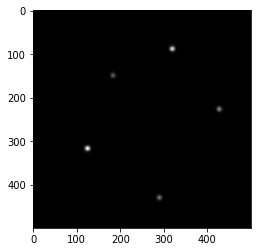

In [30]:
plt.imshow(stars_image, interpolation = 'nearest', cmap = 'gray')

#Stars_Detection

In [40]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

In [41]:
mean, median, std = sigma_clipped_stats(stars_image, sigma=4.0)  

daofind = DAOStarFinder(fwhm=9.42, threshold=5.*std)  
sources_stars = daofind(stars_image - median)  

In [48]:
mean,median,std

(3.6532569332741285e-07, 3.3332283981690715e-116, 5.68855669186513e-06)

In [47]:
sources_stars

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,319.10246862014986,88.36140614174538,0.403012408833352,0.006407362115180438,0.006054754525847967,169,0.0,7.018204259282074,506007.71678382176,-14.260392850059365
2,183.12566549004703,149.29956134685176,0.4030872789680556,0.0059777093358876114,0.003737063394521297,169,0.0,3.020034914098044,217865.64947082658,-13.345471902815312
3,426.72010472727226,226.73498191842506,0.4029951309339317,0.009968618039583696,-0.00040841590397565987,169,0.0,4.475432951389209,322633.4040457041,-13.771773325810372
4,124.69229240415176,316.89492621266356,0.4030870139988804,0.0034307639079610487,-0.004227148717456516,169,0.0,8.106496513331308,584802.3934487224,-14.41752285352809
5,289.3251300042621,429.54812707797146,0.40265558253410505,-0.018567336329319544,0.004903969346576798,169,0.0,3.7941572033312263,272817.64645708347,-13.589681145084606


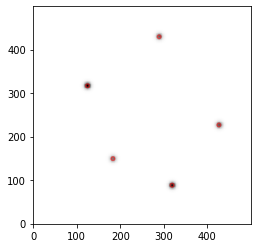

In [43]:
positions = np.transpose((sources_stars['xcentroid'], sources_stars['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(stars_image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5)

#Aperture_Photometry

In [45]:
from photutils.aperture import aperture_photometry

photo_table = aperture_photometry(stars_image, apertures)
photo_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,319.10246862014986,88.36140614174538,277.6746140561407
2,183.12566549004703,149.29956134685176,119.3350189811732
3,426.72010472727226,226.73498191842506,177.13041068793305
4,124.69229240415176,316.89492621266356,320.3239953283098
5,289.3251300042621,429.54812707797146,151.0353107435272
